In [1]:
from twitchchat import TwitchChat, timestamp

In [2]:
wapo = TwitchChat("data/315348674.json")

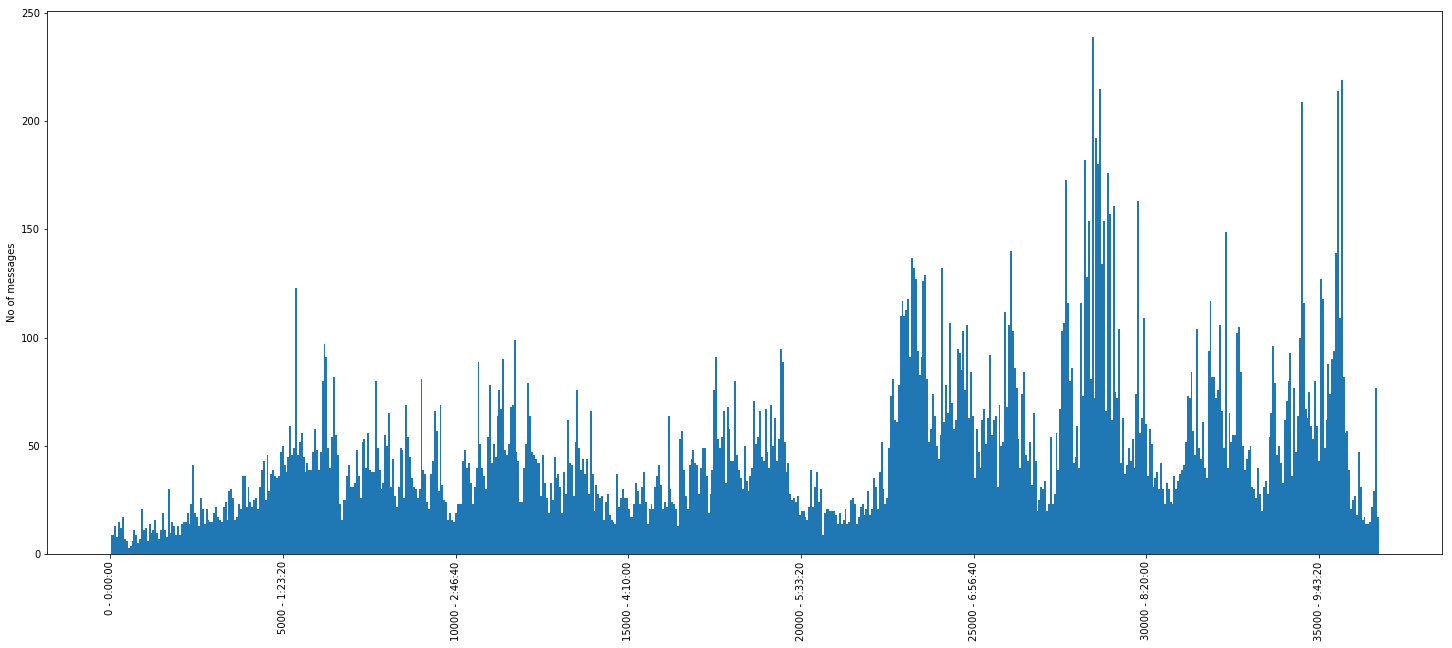

In [3]:
wapo.plot_messages()

In [4]:
corpus1 = wapo.message_corpus(5000, 20000)
corpus2 = wapo.message_corpus(21000, 36000)

In [6]:
corpus1.stats()

Number of comments: 11337
Comments without emoticons: 7215
Comments without emoticons ratio: 0.6364117491399841


In [8]:
corpus2.stats()

Number of comments: 18554
Comments without emoticons: 11788
Comments without emoticons ratio: 0.6353346987172578


In [9]:
corpus1.commenters.most_common(15)

[('washingtonpost', 204),
 ('cornholio_', 145),
 ('TorchedPotato', 120),
 ('merkypie', 119),
 ('R7PT0R', 102),
 ('RedPandaNyx', 95),
 ('EnlightenedMint', 94),
 ('Wowee_RURU', 92),
 ('Kez____', 88),
 ('PlanetMeech', 83),
 ('Heskey4lyfe', 79),
 ('Linkman95', 78),
 ('lootorshoottv', 78),
 ('smackersquiggles', 76),
 ('pRo9aMeR', 73)]

In [10]:
corpus1.emoticons.most_common(15)

[('LUL [https://static-cdn.jtvnw.net/emoticons/v1/425618/3.0]', 1012),
 ('PogChamp [https://static-cdn.jtvnw.net/emoticons/v1/88/3.0]', 465),
 ('BibleThump [https://static-cdn.jtvnw.net/emoticons/v1/86/3.0]', 261),
 (':) [https://static-cdn.jtvnw.net/emoticons/v1/1/3.0]', 212),
 ('Kappa [https://static-cdn.jtvnw.net/emoticons/v1/25/3.0]', 203),
 ('4Head [https://static-cdn.jtvnw.net/emoticons/v1/354/3.0]', 162),
 ('washpostGene [https://static-cdn.jtvnw.net/emoticons/v1/1290549/3.0]', 107),
 ('WutFace [https://static-cdn.jtvnw.net/emoticons/v1/28087/3.0]', 81),
 ('DansGame [https://static-cdn.jtvnw.net/emoticons/v1/33/3.0]', 76),
 ('HotPokket [https://static-cdn.jtvnw.net/emoticons/v1/357/3.0]', 68),
 ('FailFish [https://static-cdn.jtvnw.net/emoticons/v1/360/3.0]', 66),
 ('ResidentSleeper [https://static-cdn.jtvnw.net/emoticons/v1/245/3.0]', 65),
 ('<3 [https://static-cdn.jtvnw.net/emoticons/v1/9/3.0]', 63),
 ('NotLikeThis [https://static-cdn.jtvnw.net/emoticons/v1/58765/3.0]', 56),
 (

In [11]:
corpus2 = wapo.message_corpus(21000, 36000)

In [12]:
corpus2.commenters.most_common(15)

[('washingtonpost', 174),
 ('Kez____', 102),
 ('merkypie', 102),
 ('arcadeghost', 99),
 ('DFGRIP', 96),
 ('DEFTLyDoNE', 94),
 ('TorchedPotato', 93),
 ('highohh', 89),
 ('Vilucide', 88),
 ('Wowee_RURU', 87),
 ('DanielJNewman', 86),
 ('eldwolfe', 81),
 ('Hyperionyht', 80),
 ('phosgene22', 78),
 ('southalexander', 72)]

In [22]:
import spacy
from collections import Counter
from tqdm import tqdm
nlp = spacy.load('en')
doc = nlp(corpus1.corpus[0])



In [118]:
def term_freq(corpus):
    word_freq = Counter()
    for line in tqdm(corpus):
        doc = nlp(line)
        words = [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "NOUN"]
        word_freq.update(words)
    return word_freq

def lemmatize(corpus):
    c = []
    for line in tqdm(corpus):
        doc = nlp(line)
        words = [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True ]
        c.append(words)
    return c
    

In [119]:
c1_lemma = lemmatize(corpus1.corpus)

100%|██████████| 11337/11337 [01:44<00:00, 108.46it/s]


In [130]:
c2_lemma = lemmatize(corpus2.corpus)

100%|██████████| 18554/18554 [02:47<00:00, 110.59it/s]


In [120]:
import nltk
from collections import defaultdict
from nltk.collocations import *

In [161]:
def collocation_dict(corpus):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    #finder = BigramCollocationFinder.from_words(corpus)
    BigramCollocationFinder.default_ws = 10
    finder = BigramCollocationFinder.from_documents(corpus)
    finder.apply_freq_filter(3)
    #print(finder.nbest(bigram_measures.pmi, 90))
    bgm    = nltk.collocations.BigramAssocMeasures()
    scored = finder.score_ngrams( bgm.likelihood_ratio  )                                 
    prefix_keys = defaultdict(list)
    for key, scores in scored:
        prefix_keys[key[0]].append((key[1], scores))
    return prefix_keys

In [162]:
c1_coll = collocation_dict(c1_lemma)

In [203]:
c1_coll["kav"]

[("'s", 17.572622232789328), ('go', 15.189367222312217)]

In [164]:
c2_coll = collocation_dict(c2_lemma)

In [202]:
c2_coll["kav"]

[("'s", 21.858695680072614), ('innocent', 13.752727156129515)]

In [195]:
for c in corpus2._comments:
    if "innocen" in c.message:
        print(c)

6:03:09.17         [Spiderkey] - @godfearing123 If he is innocent then he is the victim.
6:03:50.93         [godfearing123] - by the looks of it, repubs dont care if he's guilty or innocent
6:04:27.63         [Garrub] - @MegaMattt @deliriumvoid And I'd be glad to go through a full investigation to show my innocence, rather than jam through a confirmation process.
6:05:24.48         [Millea9] - @coriso yes. this contrasts with his not-under-oath statements to fox news saying that he was always innocent
6:06:12.36         [MegaMattt] - Even if Kavanaugh is "found innocent" of these accusations, the damage has been done and he will be tied to this accusation forever
6:07:01.99         [Vilucide] - @deliriumvoid he should if he is innocent, but will you change your mind if he doesn't do so?
6:09:46.21         [fluttershy959] - Kavanaugh is innocent. Change my mind.
6:10:28.75         [MegaMattt] - @godfearing123 - But that's not what we are discussing anyhow - the discussion started as Kav